<a href="https://colab.research.google.com/github/swarnava-96/Credit-Card-Anomaly-Detection/blob/main/Credit_Card_Anamoly_Detection_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Anamoly Detection**
In this project, we will apply Artificial Neural Network (ANN) to detect whether a trasaction is Fraudulent or not. 
### Importing the necessary libraries

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


In [2]:
# Importing the dataset
import pandas as pd
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Lets see the shape of the dataset
df.shape

(284807, 31)

### Exploratory Data Analysis (EDA)

In [4]:
# Lets see the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Lets check for null values
df.isnull().values.any()

False

We can see that there is no null values in our data.

Text(0, 0.5, 'Frequency')

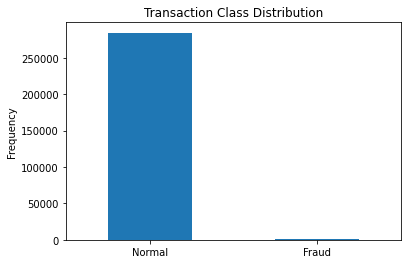

In [6]:
# Lets see whether our data is balanced or not with countplot
import matplotlib.pyplot as plt
%matplotlib inline
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df["Class"], sort = True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.ylabel("Frequency")

The data set is heavily imbalanced.

In [7]:
# Lets get the fraud and normal data
fraud = df[df["Class"] == 1]
normal = df[df["Class"] == 0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


We can see that out of 284807 records only 492 are fraudulent.

In [8]:
# Lets see the amount of fraudulent transactions
fraud["Amount"].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
# Lets see the amount of normal transactions
normal["Amount"].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We can see that fraudulent transaction amounts are very small compared to actual transactiion amounts.

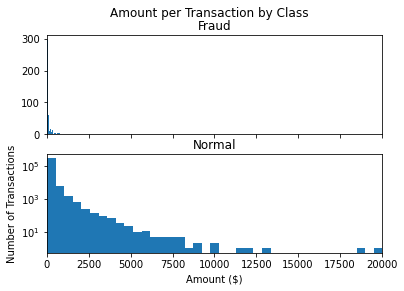

In [10]:
# Lets plot histograms to visualize actual vs fraudulent transactions amount

f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle("Amount per Transaction by Class")
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title("Fraud")
ax2.hist(normal.Amount, bins = bins)
ax2.set_title("Normal")
plt.xlabel("Amount ($)")
plt.ylabel("Number of Transactions")
plt.xlim((0,20000))
plt.yscale("log")
plt.show();

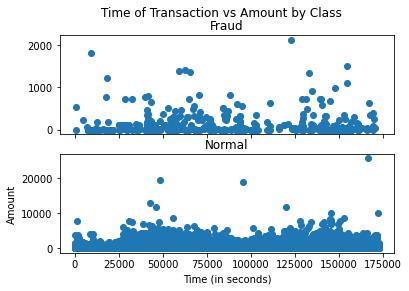

In [11]:
# Scatter plot for visualizing when fraudulent transactions occur more often

f, (ax1, ax2) = plt.subplots(2,1,sharex = True)
f.suptitle("Time of Transaction vs Amount by Class")
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title("Fraud")
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title("Normal")
plt.xlabel("Time (in seconds)")
plt.ylabel("Amount")
plt.show();

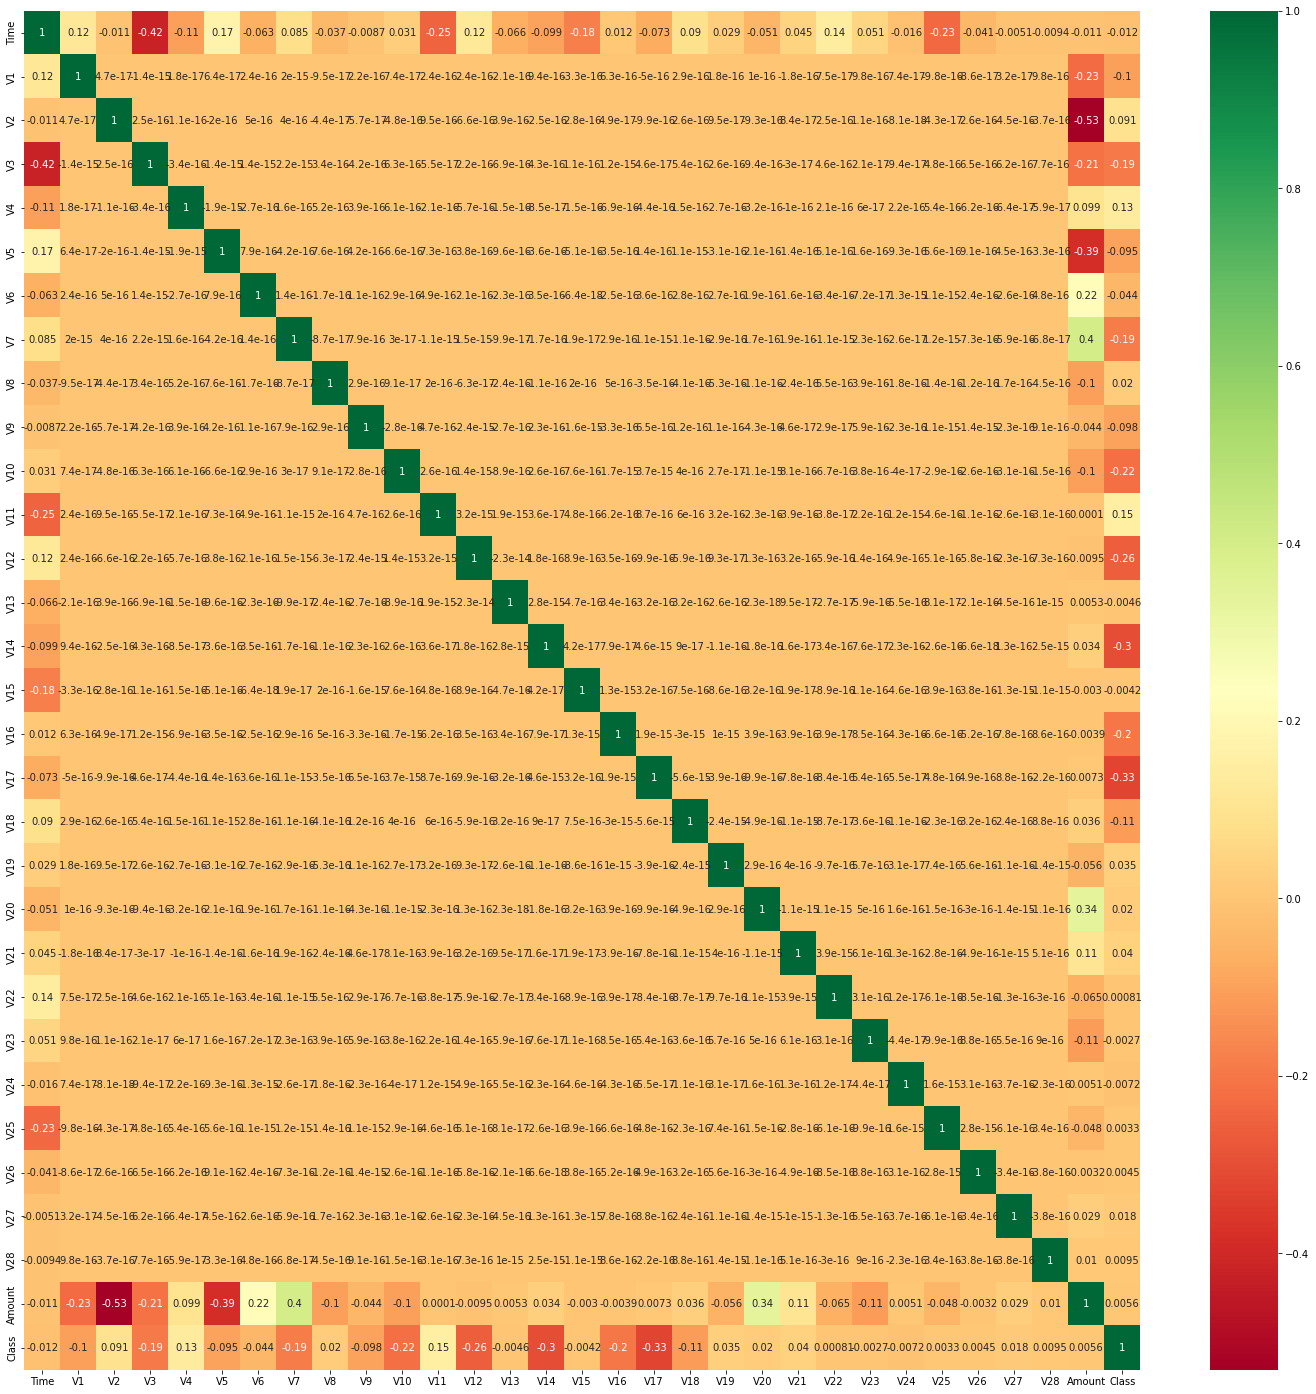

In [12]:
# Lets plot the correlation heatmap between all features
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (25,25))
# Heatmap
g = sns.heatmap(df[top_corr_features].corr(), annot = True, cmap = "RdYlGn")

### Model building
Intitially:
1. We Will Create an ANN and solve this problem(ROC AUC) 
2. We will use some Weights handling techniques to solve this imbalanced then we create the ANN.

In [13]:
# Independent and Dependent features
X = df.iloc[:,1:30]
y = df.iloc[:,-1]

In [14]:
# Lets see the Independent dataset
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
# Lets see the Dependent dataset
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [17]:
# Lets see the class distribution in the y_train data
y_train.value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [18]:
# Setting the number of input features for our ANN
n_inputs = len(X.columns)
n_inputs

29

In [19]:
# Lets install tensorflow==2.5.0
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.3 MB 17 kB/s 
     |████████████████████████████████| 4.0 MB 35.1 MB/s 
     |████████████████████████████████| 462 kB 46.1 MB/s 
     |████████████████████████████████| 1.2 MB 38.8 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.41.0
    Uninstalling grpcio-1.41.0:
      Successfully uninstalled grpcio-1.41.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [20]:
# Importing the necessary libraries
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [21]:
# Defining the model
model = Sequential()
# Defining the first hidden layer and visible layer
model.add(Dense(50, input_dim = n_inputs, activation = "relu", kernel_initializer = "he_uniform"))
# Defining output layer
model.add(Dense(1, activation = "sigmoid"))
# Defining loss and optimizer
model.compile(loss = "binary_crossentropy",
              optimizer = "adam")

In [22]:
# Lets see the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1500      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Model training
r = model.fit(X_train, y_train, epochs =10)

Epoch 1/10
6231/6231 [==============================] - 19s 3ms/step - loss: 0.0479
Epoch 2/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0109
Epoch 3/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0071
Epoch 4/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0084
Epoch 5/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0077
Epoch 6/10
6231/6231 [==============================] - 17s 3ms/step - loss: 0.0069
Epoch 7/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0089
Epoch 8/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0074
Epoch 9/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0064
Epoch 10/10
6231/6231 [==============================] - 16s 3ms/step - loss: 0.0061


In [25]:
# Prediction 
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.9603433171127946


#### Weighted Neural Network With Keras to handle imbalanced dataset
1. Define Weights
2. Fit the model with thos specific weights

In [26]:
# Defining the weights
weights_assigned = {0:1, 1:550}

In [27]:
# define model
model = Sequential()
# defining first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# defining output layer
model.add(Dense(1, activation='sigmoid'))
# defining loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
6231/6231 [==============================] - 19s 3ms/step - loss: 3.6733
Epoch 2/10
6231/6231 [==============================] - 18s 3ms/step - loss: 2.5929
Epoch 3/10
6231/6231 [==============================] - 18s 3ms/step - loss: 2.4039
Epoch 4/10
6231/6231 [==============================] - 18s 3ms/step - loss: 2.1098
Epoch 5/10
6231/6231 [==============================] - 18s 3ms/step - loss: 1.8273
Epoch 6/10
6231/6231 [==============================] - 18s 3ms/step - loss: 2.2295
Epoch 7/10
6231/6231 [==============================] - 18s 3ms/step - loss: 2.2845
Epoch 8/10
6231/6231 [==============================] - 18s 3ms/step - loss: 1.9489
Epoch 9/10
6231/6231 [==============================] - 18s 3ms/step - loss: 1.8244
Epoch 10/10
6231/6231 [==============================] - 18s 3ms/step - loss: 2.0849


In [28]:
# Prediction 
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
print(roc_auc_score(y_test,y_pred))

0.9749024974848627


Hence, we can see that the model performs better.